In [1]:
import pandas as pd

from scipy.io import loadmat

In [3]:
loadmat('/home/ec2-user/raw_data/bmw10_ims/bmw10_annos.mat')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Jan 17 17:47:08 2014',
 '__version__': '1.0',
 '__globals__': [],
 'train_indices': array([[119],
        [127],
        [109],
        [121],
        [122],
        [ 93],
        [ 90],
        [103],
        [ 98],
        [117],
        [132],
        [138],
        [120],
        [ 94],
        [125],
        [129],
        [115],
        [104],
        [128],
        [134],
        [101],
        [133],
        [ 95],
        [ 92],
        [135],
        [140],
        [116],
        [200],
        [193],
        [192],
        [156],
        [197],
        [169],
        [170],
        [202],
        [155],
        [206],
        [178],
        [161],
        [175],
        [179],
        [173],
        [163],
        [171],
        [187],
        [204],
        [201],
        [159],
        [177],
        [182],
        [190],
        [199],
        [181],
        [157],
        [224],
        [253],
    

In [3]:
#convert class data from .mat to .csv
#will clean on excel locally

classes = loadmat('/home/ec2-user/raw_data/devkit/cars_meta.mat')

pd.DataFrame([i[0].split(' ') for i in classes['class_names'][0]]).to_csv('/home/ec2-user/hold.csv')

In [2]:
#convert training metadata from .mat to .csv

training_data_raw = loadmat('/home/ec2-user/raw_data/devkit/cars_train_annos.mat')['annotations'][0]

training_data_flat = []
for i in training_data_raw:
    list_row = list(i)
    training_data_flat.append([j[0][0] for j in list_row[:-1]] + [list_row[-1][0]])

training_data = pd.DataFrame(training_data_flat, columns = ['bbox_x1', 'bbox_y1', 
                                                            'bbox_x2', 'bbox_y2', 
                                                            'class', 'fname'])

training_data.to_csv('/home/ec2-user/training_data_meta.csv', index = False, header = True)

In [22]:
#Join cleaned class data with training metadata

labels = pd.read_csv('/home/ec2-user/stanford_labels_cleaned.csv')

In [23]:
pd.merge(training_data, labels, on = 'class', how = 'left')

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,Make,Model,Body Type,Year
0,39,116,569,375,14,00001.jpg,Audi,TTS,Coupe,2012
1,36,116,868,587,3,00002.jpg,Acura,TL,Sedan,2012
2,85,109,601,381,91,00003.jpg,Dodge,Dakota,Club Cab,2007
3,621,393,1484,1096,134,00004.jpg,Hyundai,Sonata Hybrid,Sedan,2012
4,14,36,133,99,106,00005.jpg,Ford,F-450 Super Duty,Crew Cab,2012
5,259,289,515,416,123,00006.jpg,Geo,Metro,Convertible,1993
6,88,80,541,397,89,00007.jpg,Dodge,Journey,SUV,2012
7,73,79,591,410,96,00008.jpg,Dodge,Charger,Sedan,2012
8,20,126,1269,771,167,00009.jpg,Mitsubishi,Lancer,Sedan,2012
9,21,110,623,367,58,00010.jpg,Chevrolet,Traverse,SUV,2012


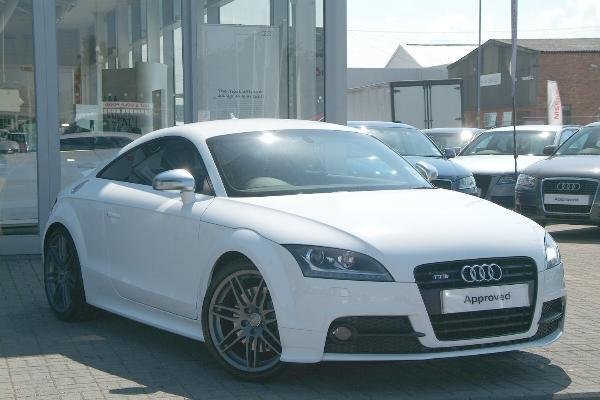

In [24]:
from IPython.display import Image

Image(filename='/home/ec2-user/00001.jpg') 